## Documents Extraction and Processing

Lets first obtain the file that maps the tickers with the CIKs

In [1]:
import requests
import json
from pathlib import Path
import os

# --- Configuration (from previous step) ---
HEADERS = {
    "User-Agent": "EdgarTutorial/1.0 (YourName your.email@domain.com)" 
}
TICKER_CIK_URL = "https://www.sec.gov/files/company_tickers.json"
OUTPUT_FILE = Path("sec_data/company_tickers.json")

# Ensure directory exists
OUTPUT_FILE.parent.mkdir(parents=True, exist_ok=True)
# ----------------------------------------

# 1. Download the JSON data
print("Downloading CIK-Ticker map...")
response = requests.get(TICKER_CIK_URL, headers=HEADERS, timeout=15)
response.raise_for_status()
raw_data = response.json() # Load into Python dictionary

# 2. Open the file and use json.dump() with indent=4
print(f"Saving JSON in readable format to {OUTPUT_FILE.absolute()}...")

# Use 'w' mode to write the file
with open(OUTPUT_FILE, 'w') as f:
    # Key Fix: The 'indent=4' parameter tells the JSON module to format the output 
    # with 4 spaces for each level of nesting, adding line breaks automatically.
    json.dump(raw_data, f, indent=4) 

print("✅ JSON saved successfully with proper line breaks and indentation.")

# --- Optional: Print a Snippet to Console (Also Pretty-Printed) ---
# If you want to print to the console instead of a file, use json.dumps()
print("\n--- Console Snippet (Pretty-Printed) ---")
# Print the first 3 key-value pairs from the dictionary
keys = list(raw_data.keys())
snippet = {k: raw_data[k] for k in keys[:3]}

# Use json.dumps() with indent=2 to format the string output
pretty_string = json.dumps(snippet, indent=2)
print(pretty_string)

Saving JSON in readable format to /home/alvar/CascadeProjects/windsurf-project/RAG/notebooks/sec_data/company_tickers.json...
✅ JSON saved successfully with proper line breaks and indentation.

--- Console Snippet (Pretty-Printed) ---
{
  "0": {
    "cik_str": 1045810,
    "ticker": "NVDA",
    "title": "NVIDIA CORP"
  },
  "1": {
    "cik_str": 320193,
    "ticker": "AAPL",
    "title": "Apple Inc."
  },
  "2": {
    "cik_str": 789019,
    "ticker": "MSFT",
    "title": "MICROSOFT CORP"
  }
}


### Vanguard Index Funds

In [ ]:
import pandas as pd
from io import StringIO

import sys
from pathlib import Path

sys.path.append('../src')
from simple_rag.extraction.parser import BlackRockFiling


set_identity("luis.alvarez.conde@alumnos.upm.es")

ticker = "VOO"
fund = Company(ticker)
all_filings = fund.get_filings(form="N-CSR")


if all_filings:
    # 1. Find the most recent date in the entire history (e.g., "2024-12-31")
    latest_date_str = max(f.report_date for f in all_filings)
    
    # 2. Extract just the YEAR (e.g., "2024")
    target_year = latest_date_str[:4]
    
    # 3. Filter: Keep ALL filings where the report_date starts with that year
    # This captures the March, June, and December reports for that fiscal year
    latest_filings = [
        f for f in all_filings 
        if f.report_date and f.report_date.startswith(target_year)
    ]



for filing in latest_filings:

    html_content = filing.html()
    
    parser = BlackRockFiling(html_content)
    funds_list = parser.get_funds()

print(len(funds_list))



Processing: Vanguard Extended Market Index Fund
Extracting context:  FY2024_C000007779Member
Tag not found:  dei:SecurityExchangeName FY2024_C000007779Member
Failed to extract tables from block:  oef:LineGraphTableTextBlock
No tables found for block:  oef:LineGraphTableTextBlock
Processing: Vanguard Extended Market Index Fund
Extracting context:  FY2024_C000007782Member
Tag not found:  dei:SecurityExchangeName FY2024_C000007782Member
Failed to extract tables from block:  oef:LineGraphTableTextBlock
No tables found for block:  oef:LineGraphTableTextBlock
Processing: Vanguard Extended Market Index Fund
Extracting context:  FY2024_C000007780Member
Tag not found:  dei:SecurityExchangeName FY2024_C000007780Member
Failed to extract tables from block:  oef:LineGraphTableTextBlock
No tables found for block:  oef:LineGraphTableTextBlock
Processing: Vanguard Extended Market Index Fund
Extracting context:  FY2024_C000007781Member
Tag not found:  dei:SecurityExchangeName FY2024_C000007781Member
Fa

In [7]:
parser.print_fund_info(funds_list)

Showing information of 16 funds


### 🏦 500 Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000007773Member
🎫 Ticker:          VFINX
🏷️ Share Class:     Investor Shares
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    N/A

--- 💰 Costs & Financials ---
Net Assets          : 1,350,332
Expense Ratio       : 0.14
Turnover Rate       : 2
Costs per $10k      : 16
Advisory Fees       : 20,816
Number of Holdings  : 516

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the Standard & Poor's 500 Index.U.S. economic growth hovered around 3% on a year-over-year basis for much ..."


**📈 Performance History**

,Unnamed: 0,Investor Shares,S&P 500 Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,2014,"$10,000","$10,000","$10,000"
1,2015,"$10,091","$10,095","$10,180"
2,2015,"$10,117","$10,123","$10,192"
3,2015,"$9,462","$9,471","$9,451"
4,2015,"$10,125","$10,138","$10,044"
5,2016,"$10,258","$10,275","$10,136"
6,2016,"$10,506","$10,527","$10,401"
7,2016,"$10,907","$10,933","$10,862"
8,2016,"$11,321","$11,351","$11,312"
9,2017,"$12,004","$12,039","$11,967"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,10 Years
0,Investor Shares,24.84%,14.37%,12.95%
1,S&P 500 Index,25.02%,14.53%,13.10%
2,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,12.48%


**🏗️ Sector Allocation**

,0,1,2
0,Communication Services,9.4%,NaN
1,Consumer Discretionary,11.2%,NaN
2,Consumer Staples,5.5%,NaN
3,Energy,3.2%,NaN
4,Financials,13.6%,NaN
5,Health Care,10.1%,NaN
6,Industrials,8.1%,NaN
7,Information Technology,32.4%,NaN
8,Materials,1.9%,NaN
9,Real Estate,2.1%,NaN


### 🏦 500 Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000092055Member
🎫 Ticker:          VOO
🏷️ Share Class:     ETF Shares
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    N/A

--- 💰 Costs & Financials ---
Net Assets          : 1,350,332
Expense Ratio       : 0.03
Turnover Rate       : 2
Costs per $10k      : 3
Advisory Fees       : 20,816
Number of Holdings  : 516

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the Standard & Poor's 500 Index.U.S. economic growth hovered around 3% on a year-over-year basis for much ..."


**📈 Performance History**

,Unnamed: 0,ETF Shares Net Asset Value,S&P 500 Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,2014,"$10,000","$10,000","$10,000"
1,2015,"$10,094","$10,095","$10,180"
2,2015,"$10,123","$10,123","$10,192"
3,2015,"$9,469","$9,471","$9,451"
4,2015,"$10,135","$10,138","$10,044"
5,2016,"$10,271","$10,275","$10,136"
6,2016,"$10,522","$10,527","$10,401"
7,2016,"$10,927","$10,933","$10,862"
8,2016,"$11,345","$11,351","$11,312"
9,2017,"$12,031","$12,039","$11,967"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,10 Years
0,ETF Shares Net Asset Value,24.98%,14.48%,13.06%
1,ETF Shares Market Price,24.94%,14.49%,13.06%
2,S&P 500 Index,25.02%,14.53%,13.10%
3,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,12.48%


**🏗️ Sector Allocation**

,0,1,2
0,Communication Services,9.4%,NaN
1,Consumer Discretionary,11.2%,NaN
2,Consumer Staples,5.5%,NaN
3,Energy,3.2%,NaN
4,Financials,13.6%,NaN
5,Health Care,10.1%,NaN
6,Industrials,8.1%,NaN
7,Information Technology,32.4%,NaN
8,Materials,1.9%,NaN
9,Real Estate,2.1%,NaN


### 🏦 500 Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000007774Member
🎫 Ticker:          VFIAX
🏷️ Share Class:     Admiral™ Shares
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    N/A

--- 💰 Costs & Financials ---
Net Assets          : 1,350,332
Expense Ratio       : 0.04
Turnover Rate       : 2
Costs per $10k      : 4
Advisory Fees       : 20,816
Number of Holdings  : 516

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the Standard & Poor's 500 Index.U.S. economic growth hovered around 3% on a year-over-year basis for much ..."


**📈 Performance History**

,Unnamed: 0,Admiral Shares,S&P 500 Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,2014,"$10,000","$10,000","$10,000"
1,2015,"$10,094","$10,095","$10,180"
2,2015,"$10,123","$10,123","$10,192"
3,2015,"$9,470","$9,471","$9,451"
4,2015,"$10,136","$10,138","$10,044"
5,2016,"$10,272","$10,275","$10,136"
6,2016,"$10,523","$10,527","$10,401"
7,2016,"$10,928","$10,933","$10,862"
8,2016,"$11,345","$11,351","$11,312"
9,2017,"$12,032","$12,039","$11,967"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,10 Years
0,Admiral Shares,24.97%,14.48%,13.06%
1,S&P 500 Index,25.02%,14.53%,13.10%
2,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,12.48%


**🏗️ Sector Allocation**

,0,1,2
0,Communication Services,9.4%,NaN
1,Consumer Discretionary,11.2%,NaN
2,Consumer Staples,5.5%,NaN
3,Energy,3.2%,NaN
4,Financials,13.6%,NaN
5,Health Care,10.1%,NaN
6,Industrials,8.1%,NaN
7,Information Technology,32.4%,NaN
8,Materials,1.9%,NaN
9,Real Estate,2.1%,NaN


### 🏦 500 Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000170274Member
🎫 Ticker:          VFFSX
🏷️ Share Class:     Institutional Select Share Class
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    N/A

--- 💰 Costs & Financials ---
Net Assets          : 1,350,332
Expense Ratio       : 0.01
Turnover Rate       : 2
Costs per $10k      : 1
Advisory Fees       : 20,816
Number of Holdings  : 516

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the Standard & Poor's 500 Index.U.S. economic growth hovered around 3% on a year-over-year basis for much ..."


**📈 Performance History**

,Unnamed: 0,Institutional Select Share Class,S&P 500 Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,6/24/16,"$5,000,000,000","$5,000,000,000","$5,000,000,000"
1,6/30/16,"$5,152,656,423","$5,152,577,879","$5,147,526,005"
2,9/30/16,"$5,351,187,741","$5,351,059,644","$5,375,816,703"
3,12/31/16,"$5,556,006,018","$5,555,696,904","$5,598,236,535"
4,3/31/17,"$5,892,894,070","$5,892,712,361","$5,922,524,381"
5,6/30/17,"$6,074,753,290","$6,074,688,823","$6,100,664,780"
6,9/30/17,"$6,347,363,071","$6,346,856,796","$6,379,289,163"
7,12/31/17,"$6,769,029,785","$6,768,592,456","$6,782,952,897"
8,3/31/18,"$6,717,278,809","$6,717,209,557","$6,741,940,992"
9,6/30/18,"$6,947,757,117","$6,947,870,304","$7,003,081,023"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,Since Inception 6/24/16
0,Institutional Select Share Class,25.00%,14.52%,15.25%
1,S&P 500 Index,25.02%,14.53%,15.26%
2,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,14.66%


**🏗️ Sector Allocation**

,0,1,2
0,Communication Services,9.4%,NaN
1,Consumer Discretionary,11.2%,NaN
2,Consumer Staples,5.5%,NaN
3,Energy,3.2%,NaN
4,Financials,13.6%,NaN
5,Health Care,10.1%,NaN
6,Industrials,8.1%,NaN
7,Information Technology,32.4%,NaN
8,Materials,1.9%,NaN
9,Real Estate,2.1%,NaN


### 🏦 Value Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000007775Member
🎫 Ticker:          VIVAX
🏷️ Share Class:     Investor Shares
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    N/A

--- 💰 Costs & Financials ---
Net Assets          : 183,569
Expense Ratio       : 0.17
Turnover Rate       : 9
Costs per $10k      : 18
Advisory Fees       : 3,184
Number of Holdings  : 348

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the CRSP US Large Cap Value Index.U.S. economic growth hovered around 3% on a year-over-year basis for muc..."


**📈 Performance History**

,Unnamed: 0,Investor Shares,CRSP US Large Cap Value Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,2014,"$10,000","$10,000","$10,000"
1,2015,"$9,940","$9,945","$10,180"
2,2015,"$9,984","$9,993","$10,192"
3,2015,"$9,257","$9,268","$9,451"
4,2015,"$9,897","$9,914","$10,044"
5,2016,"$10,055","$10,078","$10,136"
6,2016,"$10,434","$10,462","$10,401"
7,2016,"$10,748","$10,781","$10,862"
8,2016,"$11,554","$11,592","$11,312"
9,2017,"$11,926","$11,972","$11,967"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,10 Years
0,Investor Shares,15.84%,9.80%,9.86%
1,CRSP US Large Cap Value Index,16.00%,9.93%,10.01%
2,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,12.48%


**🏗️ Sector Allocation**

,0,1,2
0,Basic Materials,1.8%,NaN
1,Consumer Discretionary,9.2%,NaN
2,Consumer Staples,8.6%,NaN
3,Energy,6.6%,NaN
4,Financials,21.6%,NaN
5,Health Care,15.5%,NaN
6,Industrials,15.6%,NaN
7,Real Estate,3.1%,NaN
8,Technology,8.9%,NaN
9,Telecommunications,3.4%,NaN


### 🏦 Value Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000007778Member
🎫 Ticker:          VTV
🏷️ Share Class:     ETF Shares
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    NYSE

--- 💰 Costs & Financials ---
Net Assets          : 183,569
Expense Ratio       : 0.04
Turnover Rate       : 9
Costs per $10k      : 4
Advisory Fees       : 3,184
Number of Holdings  : 348

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the CRSP US Large Cap Value Index.U.S. economic growth hovered around 3% on a year-over-year basis for muc..."


**📈 Performance History**

,Unnamed: 0,ETF Shares Net Asset Value,CRSP US Large Cap Value Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,2014,"$10,000","$10,000","$10,000"
1,2015,"$9,945","$9,945","$10,180"
2,2015,"$9,993","$9,993","$10,192"
3,2015,"$9,266","$9,268","$9,451"
4,2015,"$9,911","$9,914","$10,044"
5,2016,"$10,074","$10,078","$10,136"
6,2016,"$10,456","$10,462","$10,401"
7,2016,"$10,775","$10,781","$10,862"
8,2016,"$11,585","$11,592","$11,312"
9,2017,"$11,963","$11,972","$11,967"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,10 Years
0,ETF Shares Net Asset Value,16.00%,9.93%,10.00%
1,ETF Shares Market Price,15.94%,9.93%,10.00%
2,CRSP US Large Cap Value Index,16.00%,9.93%,10.01%
3,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,12.48%


**🏗️ Sector Allocation**

,0,1,2
0,Basic Materials,1.8%,NaN
1,Consumer Discretionary,9.2%,NaN
2,Consumer Staples,8.6%,NaN
3,Energy,6.6%,NaN
4,Financials,21.6%,NaN
5,Health Care,15.5%,NaN
6,Industrials,15.6%,NaN
7,Real Estate,3.1%,NaN
8,Technology,8.9%,NaN
9,Telecommunications,3.4%,NaN


### 🏦 Value Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000007776Member
🎫 Ticker:          VVIAX
🏷️ Share Class:     Admiral™ Shares
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    N/A

--- 💰 Costs & Financials ---
Net Assets          : 183,569
Expense Ratio       : 0.05
Turnover Rate       : 9
Costs per $10k      : 5
Advisory Fees       : 3,184
Number of Holdings  : 348

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the CRSP US Large Cap Value Index.U.S. economic growth hovered around 3% on a year-over-year basis for muc..."


**📈 Performance History**

,Unnamed: 0,Admiral Shares,CRSP US Large Cap Value Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,2014,"$10,000","$10,000","$10,000"
1,2015,"$9,943","$9,945","$10,180"
2,2015,"$9,994","$9,993","$10,192"
3,2015,"$9,266","$9,268","$9,451"
4,2015,"$9,914","$9,914","$10,044"
5,2016,"$10,076","$10,078","$10,136"
6,2016,"$10,459","$10,462","$10,401"
7,2016,"$10,777","$10,781","$10,862"
8,2016,"$11,586","$11,592","$11,312"
9,2017,"$11,963","$11,972","$11,967"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,10 Years
0,Admiral Shares,15.99%,9.93%,9.99%
1,CRSP US Large Cap Value Index,16.00%,9.93%,10.01%
2,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,12.48%


**🏗️ Sector Allocation**

,0,1,2
0,Basic Materials,1.8%,NaN
1,Consumer Discretionary,9.2%,NaN
2,Consumer Staples,8.6%,NaN
3,Energy,6.6%,NaN
4,Financials,21.6%,NaN
5,Health Care,15.5%,NaN
6,Industrials,15.6%,NaN
7,Real Estate,3.1%,NaN
8,Technology,8.9%,NaN
9,Telecommunications,3.4%,NaN


### 🏦 Value Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000007777Member
🎫 Ticker:          VIVIX
🏷️ Share Class:     Institutional Shares
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    N/A

--- 💰 Costs & Financials ---
Net Assets          : 183,569
Expense Ratio       : 0.04
Turnover Rate       : 9
Costs per $10k      : 4
Advisory Fees       : 3,184
Number of Holdings  : 348

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the CRSP US Large Cap Value Index.U.S. economic growth hovered around 3% on a year-over-year basis for muc..."


**📈 Performance History**

,Unnamed: 0,Institutional Shares,CRSP US Large Cap Value Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,2014,"$5,000,000","$5,000,000","$5,000,000"
1,2015,"$4,971,871","$4,972,417","$5,090,054"
2,2015,"$4,997,132","$4,996,694","$5,096,078"
3,2015,"$4,633,467","$4,633,912","$4,725,720"
4,2015,"$4,957,449","$4,957,090","$5,022,045"
5,2016,"$5,038,463","$5,039,202","$5,067,957"
6,2016,"$5,228,516","$5,231,204","$5,200,452"
7,2016,"$5,387,648","$5,390,397","$5,431,090"
8,2016,"$5,793,893","$5,796,215","$5,655,796"
9,2017,"$5,982,618","$5,986,133","$5,983,419"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,10 Years
0,Institutional Shares,15.98%,9.94%,10.00%
1,CRSP US Large Cap Value Index,16.00%,9.93%,10.01%
2,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,12.48%


**🏗️ Sector Allocation**

,0,1,2
0,Basic Materials,1.8%,NaN
1,Consumer Discretionary,9.2%,NaN
2,Consumer Staples,8.6%,NaN
3,Energy,6.6%,NaN
4,Financials,21.6%,NaN
5,Health Care,15.5%,NaN
6,Industrials,15.6%,NaN
7,Real Estate,3.1%,NaN
8,Technology,8.9%,NaN
9,Telecommunications,3.4%,NaN


### 🏦 Growth Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000007783Member
🎫 Ticker:          VIGRX
🏷️ Share Class:     Investor Shares
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    N/A

--- 💰 Costs & Financials ---
Net Assets          : 284,976
Expense Ratio       : 0.17
Turnover Rate       : 11
Costs per $10k      : 20
Advisory Fees       : 4,355
Number of Holdings  : 183

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the CRSP US Large Cap Growth Index.U.S. economic growth hovered around 3% on a year-over-year basis for mu..."


**📈 Performance History**

,Unnamed: 0,Investor Shares,CRSP US Large Cap Growth Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,2014,"$10,000","$10,000","$10,000"
1,2015,"$10,340","$10,346","$10,180"
2,2015,"$10,314","$10,325","$10,192"
3,2015,"$9,690","$9,705","$9,451"
4,2015,"$10,317","$10,338","$10,044"
5,2016,"$10,349","$10,376","$10,136"
6,2016,"$10,451","$10,482","$10,401"
7,2016,"$10,985","$11,021","$10,862"
8,2016,"$10,936","$10,975","$11,312"
9,2017,"$11,981","$12,031","$11,967"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,10 Years
0,Investor Shares,32.50%,18.21%,15.61%
1,CRSP US Large Cap Growth Index,32.73%,18.41%,15.80%
2,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,12.48%


**🏗️ Sector Allocation**

,0,1,2
0,Basic Materials,0.7%,NaN
1,Consumer Discretionary,19.8%,NaN
2,Consumer Staples,0.4%,NaN
3,Energy,0.8%,NaN
4,Financials,2.7%,NaN
5,Health Care,5.7%,NaN
6,Industrials,8.4%,NaN
7,Real Estate,1.3%,NaN
8,Technology,59.0%,NaN
9,Telecommunications,0.9%,NaN


### 🏦 Growth Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000007786Member
🎫 Ticker:          VUG
🏷️ Share Class:     ETF Shares
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    NYSE

--- 💰 Costs & Financials ---
Net Assets          : 284,976
Expense Ratio       : 0.04
Turnover Rate       : 11
Costs per $10k      : 5
Advisory Fees       : 4,355
Number of Holdings  : 183

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the CRSP US Large Cap Growth Index.U.S. economic growth hovered around 3% on a year-over-year basis for mu..."


**📈 Performance History**

,Unnamed: 0,ETF Shares Net Asset Value,CRSP US Large Cap Growth Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,2014,"$10,000","$10,000","$10,000"
1,2015,"$10,344","$10,346","$10,180"
2,2015,"$10,321","$10,325","$10,192"
3,2015,"$9,701","$9,705","$9,451"
4,2015,"$10,332","$10,338","$10,044"
5,2016,"$10,367","$10,376","$10,136"
6,2016,"$10,473","$10,482","$10,401"
7,2016,"$11,010","$11,021","$10,862"
8,2016,"$10,965","$10,975","$11,312"
9,2017,"$12,018","$12,031","$11,967"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,10 Years
0,ETF Shares Net Asset Value,32.68%,18.36%,15.76%
1,ETF Shares Market Price,32.64%,18.37%,15.76%
2,CRSP US Large Cap Growth Index,32.73%,18.41%,15.80%
3,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,12.48%


**🏗️ Sector Allocation**

,0,1,2
0,Basic Materials,0.7%,NaN
1,Consumer Discretionary,19.8%,NaN
2,Consumer Staples,0.4%,NaN
3,Energy,0.8%,NaN
4,Financials,2.7%,NaN
5,Health Care,5.7%,NaN
6,Industrials,8.4%,NaN
7,Real Estate,1.3%,NaN
8,Technology,59.0%,NaN
9,Telecommunications,0.9%,NaN


### 🏦 Growth Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000007784Member
🎫 Ticker:          VIGAX
🏷️ Share Class:     Admiral™ Shares
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    N/A

--- 💰 Costs & Financials ---
Net Assets          : 284,976
Expense Ratio       : 0.05
Turnover Rate       : 11
Costs per $10k      : 6
Advisory Fees       : 4,355
Number of Holdings  : 183

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the CRSP US Large Cap Growth Index.U.S. economic growth hovered around 3% on a year-over-year basis for mu..."


**📈 Performance History**

,Unnamed: 0,Admiral Shares,CRSP US Large Cap Growth Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,2014,"$10,000","$10,000","$10,000"
1,2015,"$10,344","$10,346","$10,180"
2,2015,"$10,320","$10,325","$10,192"
3,2015,"$9,699","$9,705","$9,451"
4,2015,"$10,330","$10,338","$10,044"
5,2016,"$10,365","$10,376","$10,136"
6,2016,"$10,470","$10,482","$10,401"
7,2016,"$11,009","$11,021","$10,862"
8,2016,"$10,963","$10,975","$11,312"
9,2017,"$12,014","$12,031","$11,967"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,10 Years
0,Admiral Shares,32.66%,18.36%,15.75%
1,CRSP US Large Cap Growth Index,32.73%,18.41%,15.80%
2,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,12.48%


**🏗️ Sector Allocation**

,0,1,2
0,Basic Materials,0.7%,NaN
1,Consumer Discretionary,19.8%,NaN
2,Consumer Staples,0.4%,NaN
3,Energy,0.8%,NaN
4,Financials,2.7%,NaN
5,Health Care,5.7%,NaN
6,Industrials,8.4%,NaN
7,Real Estate,1.3%,NaN
8,Technology,59.0%,NaN
9,Telecommunications,0.9%,NaN


### 🏦 Growth Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000007785Member
🎫 Ticker:          VIGIX
🏷️ Share Class:     Institutional Shares
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    N/A

--- 💰 Costs & Financials ---
Net Assets          : 284,976
Expense Ratio       : 0.04
Turnover Rate       : 11
Costs per $10k      : 5
Advisory Fees       : 4,355
Number of Holdings  : 183

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the CRSP US Large Cap Growth Index.U.S. economic growth hovered around 3% on a year-over-year basis for mu..."


**📈 Performance History**

,Unnamed: 0,Institutional Shares,CRSP US Large Cap Growth Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,2014,"$5,000,000","$5,000,000","$5,000,000"
1,2015,"$5,172,206","$5,173,192","$5,090,054"
2,2015,"$5,161,071","$5,162,318","$5,096,078"
3,2015,"$4,850,557","$4,852,558","$4,725,720"
4,2015,"$5,166,364","$5,169,146","$5,022,045"
5,2016,"$5,184,201","$5,187,759","$5,067,957"
6,2016,"$5,237,051","$5,240,785","$5,200,452"
7,2016,"$5,506,240","$5,510,594","$5,431,090"
8,2016,"$5,483,263","$5,487,362","$5,655,796"
9,2017,"$6,010,352","$6,015,412","$5,983,419"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,10 Years
0,Institutional Shares,32.68%,18.37%,15.76%
1,CRSP US Large Cap Growth Index,32.73%,18.41%,15.80%
2,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,12.48%


**🏗️ Sector Allocation**

,0,1,2
0,Basic Materials,0.7%,NaN
1,Consumer Discretionary,19.8%,NaN
2,Consumer Staples,0.4%,NaN
3,Energy,0.8%,NaN
4,Financials,2.7%,NaN
5,Health Care,5.7%,NaN
6,Industrials,8.4%,NaN
7,Real Estate,1.3%,NaN
8,Technology,59.0%,NaN
9,Telecommunications,0.9%,NaN


### 🏦 Large-Cap Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000007787Member
🎫 Ticker:          VLACX
🏷️ Share Class:     Investor Shares
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    N/A

--- 💰 Costs & Financials ---
Net Assets          : 56,785
Expense Ratio       : 0.17
Turnover Rate       : 2
Costs per $10k      : 19
Advisory Fees       : 955
Number of Holdings  : 494

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the CRSP US Large Cap Index.U.S. economic growth hovered around 3% on a year-over-year basis for much of t..."


**📈 Performance History**

,Unnamed: 0,Investor Shares,CRSP US Large Cap Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,2014,"$10,000","$10,000","$10,000"
1,2015,"$10,125","$10,131","$10,180"
2,2015,"$10,137","$10,147","$10,192"
3,2015,"$9,457","$9,470","$9,451"
4,2015,"$10,093","$10,111","$10,044"
5,2016,"$10,189","$10,217","$10,136"
6,2016,"$10,436","$10,471","$10,401"
7,2016,"$10,855","$10,894","$10,862"
8,2016,"$11,254","$11,298","$11,312"
9,2017,"$11,946","$11,998","$11,967"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,10 Years
0,Investor Shares,24.95%,14.34%,12.87%
1,CRSP US Large Cap Index,25.15%,14.51%,13.05%
2,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,12.48%


**🏗️ Sector Allocation**

,0,1,2
0,Basic Materials,1.2%,NaN
1,Consumer Discretionary,15.1%,NaN
2,Consumer Staples,4.0%,NaN
3,Energy,3.2%,NaN
4,Financials,10.8%,NaN
5,Health Care,9.8%,NaN
6,Industrials,11.3%,NaN
7,Real Estate,2.0%,NaN
8,Technology,38.0%,NaN
9,Telecommunications,2.0%,NaN


### 🏦 Large-Cap Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000007790Member
🎫 Ticker:          VV
🏷️ Share Class:     ETF Shares
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    NYSE

--- 💰 Costs & Financials ---
Net Assets          : 56,785
Expense Ratio       : 0.04
Turnover Rate       : 2
Costs per $10k      : 5
Advisory Fees       : 955
Number of Holdings  : 494

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the CRSP US Large Cap Index.U.S. economic growth hovered around 3% on a year-over-year basis for much of t..."


**📈 Performance History**

,Unnamed: 0,ETF Shares Net Asset Value,CRSP US Large Cap Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,2014,"$10,000","$10,000","$10,000"
1,2015,"$10,129","$10,131","$10,180"
2,2015,"$10,145","$10,147","$10,192"
3,2015,"$9,468","$9,470","$9,451"
4,2015,"$10,107","$10,111","$10,044"
5,2016,"$10,207","$10,217","$10,136"
6,2016,"$10,459","$10,471","$10,401"
7,2016,"$10,881","$10,894","$10,862"
8,2016,"$11,284","$11,298","$11,312"
9,2017,"$11,982","$11,998","$11,967"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,10 Years
0,ETF Shares Net Asset Value,25.12%,14.48%,13.02%
1,ETF Shares Market Price,25.05%,14.48%,13.01%
2,CRSP US Large Cap Index,25.15%,14.51%,13.05%
3,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,12.48%


**🏗️ Sector Allocation**

,0,1,2
0,Basic Materials,1.2%,NaN
1,Consumer Discretionary,15.1%,NaN
2,Consumer Staples,4.0%,NaN
3,Energy,3.2%,NaN
4,Financials,10.8%,NaN
5,Health Care,9.8%,NaN
6,Industrials,11.3%,NaN
7,Real Estate,2.0%,NaN
8,Technology,38.0%,NaN
9,Telecommunications,2.0%,NaN


### 🏦 Large-Cap Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000007788Member
🎫 Ticker:          VLCAX
🏷️ Share Class:     Admiral™ Shares
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    N/A

--- 💰 Costs & Financials ---
Net Assets          : 56,785
Expense Ratio       : 0.05
Turnover Rate       : 2
Costs per $10k      : 6
Advisory Fees       : 955
Number of Holdings  : 494

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the CRSP US Large Cap Index.U.S. economic growth hovered around 3% on a year-over-year basis for much of t..."


**📈 Performance History**

,Unnamed: 0,Admiral Shares,CRSP US Large Cap Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,2014,"$10,000","$10,000","$10,000"
1,2015,"$10,131","$10,131","$10,180"
2,2015,"$10,146","$10,147","$10,192"
3,2015,"$9,468","$9,470","$9,451"
4,2015,"$10,107","$10,111","$10,044"
5,2016,"$10,206","$10,217","$10,136"
6,2016,"$10,457","$10,471","$10,401"
7,2016,"$10,881","$10,894","$10,862"
8,2016,"$11,284","$11,298","$11,312"
9,2017,"$11,981","$11,998","$11,967"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,10 Years
0,Admiral Shares,25.10%,14.47%,13.01%
1,CRSP US Large Cap Index,25.15%,14.51%,13.05%
2,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,12.48%


**🏗️ Sector Allocation**

,0,1,2
0,Basic Materials,1.2%,NaN
1,Consumer Discretionary,15.1%,NaN
2,Consumer Staples,4.0%,NaN
3,Energy,3.2%,NaN
4,Financials,10.8%,NaN
5,Health Care,9.8%,NaN
6,Industrials,11.3%,NaN
7,Real Estate,2.0%,NaN
8,Technology,38.0%,NaN
9,Telecommunications,2.0%,NaN


### 🏦 Large-Cap Index Fund

🆔 Context ID:      From2024-01-01to2024-12-31_C000007789Member
🎫 Ticker:          VLISX
🏷️ Share Class:     Institutional Shares
📅 Report Date:     December 31, 2024
🏛️ Sec Exchange:    N/A

--- 💰 Costs & Financials ---
Net Assets          : 56,785
Expense Ratio       : 0.04
Turnover Rate       : 2
Costs per $10k      : 5
Advisory Fees       : 955
Number of Holdings  : 494

📝 Commentary: "How did the Fund perform during the reporting period? For the 12 months ended December 31, 2024, the Fund performed in line with its benchmark, the CRSP US Large Cap Index.U.S. economic growth hovered around 3% on a year-over-year basis for much of t..."


**📈 Performance History**

,Unnamed: 0,Institutional Shares,CRSP US Large Cap Index,Dow Jones U.S. Total Stock Market Float Adjusted Index
0,2014,"$5,000,000","$5,000,000","$5,000,000"
1,2015,"$5,064,717","$5,065,516","$5,090,054"
2,2015,"$5,072,527","$5,073,505","$5,096,078"
3,2015,"$4,733,990","$4,735,147","$4,725,720"
4,2015,"$5,053,400","$5,055,301","$5,022,045"
5,2016,"$5,103,277","$5,108,683","$5,067,957"
6,2016,"$5,229,161","$5,235,336","$5,200,452"
7,2016,"$5,440,308","$5,446,752","$5,431,090"
8,2016,"$5,642,490","$5,649,147","$5,655,796"
9,2017,"$5,991,191","$5,998,908","$5,983,419"


**📊 Average Annual Returns**

,Unnamed: 0,1 Year,5 Years,10 Years
0,Institutional Shares,25.12%,14.49%,13.02%
1,CRSP US Large Cap Index,25.15%,14.51%,13.05%
2,Dow Jones U.S. Total Stock Market Float Adjust...,23.88%,13.78%,12.48%


**🏗️ Sector Allocation**

,0,1,2
0,Basic Materials,1.2%,NaN
1,Consumer Discretionary,15.1%,NaN
2,Consumer Staples,4.0%,NaN
3,Energy,3.2%,NaN
4,Financials,10.8%,NaN
5,Health Care,9.8%,NaN
6,Industrials,11.3%,NaN
7,Real Estate,2.0%,NaN
8,Technology,38.0%,NaN
9,Telecommunications,2.0%,NaN


In [41]:

import pandas as pd
from io import StringIO
from edgar import Company, set_identity
from pathlib import Path


set_identity("luis.alvarez.conde@alumnos.upm.es")

ticker = "VOO"
fund = Company(ticker)
all_filings = fund.get_filings(form="N-CSR")

if all_filings:
    latest_date = max(f.filing_date for f in all_filings)
    
# Filter the list to include only filings from that latest date
latest_filings = [f for f in all_filings if f.filing_date == latest_date]
funds = []
for i,f in enumerate(latest_filings):
    content = f.text()
    funds_data = extract_table_of_contents(content)
    funds.append(funds_data)

print(len(funds))
for acc_num, fund_list in enumerate(funds):
    print(f"Funds of {acc_num}:")
    for fund in fund_list:
        print(f"Ticker: {fund['ticker']}")
    print("---")
    
start_table = 3
fund_list = funds
funds_data_index = []
step = 5 


for ix, fund_group in enumerate(fund_list):
    print(f"Processing fund group {ix}: {fund_group}")
    html_content = latest_filings[ix].html()

    tables = pd.read_html(StringIO(html_content))
    text = latest_filings[ix].text()
    print(f"Found {len(tables)} tables")
    print(f"Processing {len(fund_group)} funds")
    for fund_idx, fund in enumerate(fund_group):
        print("Processing fund:", fund['ticker'])
        if ix == 1:
            step = 5
        else:
            step = 4
        chunk = extract_fund_by_ticker(text, fund['ticker'])
        print(chunk[:50])
        performance_text = extract_performance(chunk)
        if fund['ticker'] == "VFINX":
            start_table = 3
        for i, df in enumerate(tables[start_table:start_table+step]):
            table_str = df.to_string()
            if fund['ticker'] == "VFINX":
                print(df)

            if "Share Class" in table_str:
                #print("Found Share Class table")
                if len(df) > 1:
                    share_class = df.iloc[1,0]
                    cost_per_10k = df.iloc[1,1]
                    expense_ratio_percent = df.iloc[1,2]
                else:
                    share_class = df.iloc[0,0]
                    cost_per_10k = df.iloc[0,1]
                    expense_ratio_percent = df.iloc[0,2]
                continue
                
            if "Average Annual" in table_str or "1 Year" in table_str:
                #print("Found Average Annual table")
                avg_annual_returns = df.to_markdown()
                continue

            if "Fund Statistics" in table_str or "Net Assets" in table_str:
                #print("Found Fund Statistics table")
                if len(df) > 4:
                    net_assets = df.iloc[1,1]
                    total_assets = df.iloc[2,1]
                    turnover_rate = df.iloc[3,1]
                    advisory_fees = df.iloc[4,1]
                else:
                    net_assets = df.iloc[0,1]
                    total_assets = df.iloc[1,1]
                    turnover_rate = df.iloc[2,1]
                    advisory_fees = df.iloc[3,1]
                    
            if "Portfolio Composition" in table_str or "Distribution by Stated Maturity" in table_str or "Other Assets" in table_str:
                #print("Found Portfolio Composition table")
                sector_composition = df
                sector_composition_md = df.to_markdown()
                sector_composition_str = df.to_string()    
                continue   
        
            if "2014" in table_str:
                print("Found 2014 table")
                table_data = df
            else:
                table_data = None

        funds_data_index.append({
            "name": fund['fund_name'],
            "ticker": fund['ticker'],
            "share_class": share_class,
            "cost_per_10k": cost_per_10k,
            "expense_ratio_percent": expense_ratio_percent,
            "performance_text": performance_text,
            "table_data": table_data,
            "avg_annual_returns": avg_annual_returns,
            "sector_composition": sector_composition,
            "sector_composition_str": sector_composition_str,
            "sector_composition_md": sector_composition_md,
            "net_assets": net_assets,
            "n_holdings": total_assets,
            "turnover_rate": turnover_rate,
            "advisory_fees": advisory_fees
        })

        start_table += step

for fund in funds_data_index[35:]:
    print(f"Fund: {fund['name']} ({fund['ticker']})")
    print(f"Share Class: {fund['share_class']}")
    print(f"Cost per 10k: {fund['cost_per_10k']}")
    print(f"Expense Ratio: {fund['expense_ratio_percent']}")
    print(f"Performance Text: {fund['performance_text']}...")
    print(f"Table Data: {fund['table_data']}")
    print(f"Average Annual Returns: {fund['avg_annual_returns']}...")
    print(f"Sector Composition: {fund['sector_composition_md']}...")
    print(f"Net Assets: {fund['net_assets']}")
    print(f"Number of Holdings: {fund['n_holdings']}")
    print(f"Turnover Rate: {fund['turnover_rate']}")
    print(f"Advisory Fees: {fund['advisory_fees']}")
    print("-" * 50)

print(f"Processed {len(funds_data_index)} funds")

2
Funds of 0:
Ticker: VEXMX
Ticker: VXF
Ticker: VEXAX
Ticker: VIEIX
Ticker: VEMPX
Ticker: VSEMX
Ticker: VIMSX
Ticker: VO
Ticker: VIMAX
Ticker: VMCIX
Ticker: VMCPX
Ticker: VMGIX
Ticker: VOT
Ticker: VMGMX
Ticker: VMVIX
Ticker: VOE
Ticker: VMVAX
Ticker: NAESX
Ticker: VB
Ticker: VSMAX
Ticker: VSCIX
Ticker: VSCPX
Ticker: VISGX
Ticker: VBK
Ticker: VSGAX
Ticker: VSGIX
Ticker: VISVX
Ticker: VBR
Ticker: VSIAX
Ticker: VSIIX
Ticker: VTSMX
Ticker: VTI
Ticker: VTSAX
Ticker: VITSX
Ticker: VSMPX
Ticker: VSTSX
---
Funds of 1:
Ticker: VFINX
Ticker: VOO
Ticker: VFIAX
Ticker: VFFSX
Ticker: VIVAX
Ticker: VTV
Ticker: VVIAX
Ticker: VIVIX
Ticker: VIGRX
Ticker: VUG
Ticker: VIGAX
Ticker: VIGIX
Ticker: VLACX
Ticker: VV
Ticker: VLCAX
Ticker: VLISX
---
Processing fund group 0: [{'fund_name': 'Vanguard Extended Market Index Fund', 'share_class': 'Investor Shares', 'ticker': 'VEXMX'}, {'fund_name': 'Vanguard Extended Market Index Fund', 'share_class': 'ETF Shares', 'ticker': 'VXF'}, {'fund_name': 'Vanguard Extended

### Vanguard World Fund

In [28]:
import pandas as pd
from io import StringIO
from edgar import Company, set_identity
from pathlib import Path


set_identity("luis.alvarez.conde@alumnos.upm.es")

ticker = "EDV" # One of the funds of the Vanguard World Fund
fund = Company("EDV")
all_filings = fund.get_filings(form="N-CSR")

if all_filings:
    latest_date = max(f.filing_date for f in all_filings)
    
# Filter the list to include only filings from that latest date
latest_filings = [f for f in all_filings if f.filing_date == latest_date]



funds = []
for i,f in enumerate(latest_filings):
    content = f.text()
    funds_data = extract_table_of_contents(content)
    funds.append(funds_data)

print(len(funds))

for acc_num, fund_list in enumerate(funds):
    print(f"Funds of {acc_num}:")
    for fund in fund_list:
        print(f"Ticker: {fund['ticker']}")
    print("---")

# 5. Find specific tables by content
start_table = 3
fund_list = funds
funds_data_world = []
step = 5 
count = 0
step = 4
for ix, fund_group in enumerate(fund_list):
    print(f"Processing fund group {ix}: {fund_group}")
    html_content = latest_filings[ix].html()
    print("*" *200)  

    tables = pd.read_html(StringIO(html_content))
    text_content = latest_filings[ix].text()
    print(f"Found {len(tables)} tables")
    for fund_idx, fund in enumerate(fund_group):
        
        if fund['ticker'] == "VFTAX":
            start_table = 3
            step = 5
        print(f"Processing tables for fund: {fund['ticker']}")
        chunk = extract_fund_by_ticker(text_content, fund['ticker'])
        performance_commentary = extract_performance(chunk)
        check = True
        for i, df in enumerate(tables[start_table:start_table+step]):
            table_str = df.to_string()
            #print(f"Table {i}: {df}")
            if "Share Class" in table_str:
                #print("Found Share Class table")
                if len(df) > 1:
                    share_class = df.iloc[1,0]
                    cost_per_10k = df.iloc[1,1]
                    expense_ratio_percent = df.iloc[1,2]
                else:
                    share_class = df.iloc[0,0]
                    cost_per_10k = df.iloc[0,1]
                    expense_ratio_percent = df.iloc[0,2]
                continue
                
            if "Average Annual" in table_str or "1 Year" in table_str:
                #print("Found Average Annual table")
                avg_annual_returns = df.to_markdown()
                continue

            if "Fund Statistics" in table_str or "Net Assets" in table_str:
                #print("Found Fund Statistics table")
                if len(df) > 4:
                    net_assets = df.iloc[1,1]
                    total_assets = df.iloc[2,1]
                    turnover_rate = df.iloc[3,1]
                    advisory_fees = df.iloc[4,1]
                else:
                    net_assets = df.iloc[0,1]
                    total_assets = df.iloc[1,1]
                    turnover_rate = df.iloc[2,1]
                    advisory_fees = df.iloc[3,1]
                continue
            if "Portfolio Composition" in table_str or "Distribution by Stated Maturity" in table_str or "Other Assets" in table_str:
                #print("Found Portfolio Composition table")
                sector_composition = df
                sector_composition_md = df.to_markdown()
                sector_composition_str = df.to_string()    
                continue

            if "2014" in table_str or len(df) > 20:
                #print("Found Performance table")
                table_data = df
                continue
            else:
                table_data = None
                check = False
                count += 1
        if not check:
            print(f"Fund {fund['ticker']} SOMETHING WENT WRONG")
            
        funds_data_world.append({
            "name": fund['fund_name'],
            "ticker": fund['ticker'],
            "share_class": share_class,
            "cost_per_10k": cost_per_10k,
            "expense_ratio_percent": expense_ratio_percent,
            "performance_commentary": performance_commentary,
            "table_data": table_data,
            "avg_annual_returns": avg_annual_returns,
            "sector_composition": sector_composition,
            "sector_composition_str": sector_composition_str,
            "sector_composition_md": sector_composition_md,
            "net_assets": net_assets,
            "n_holdings": total_assets,
            "turnover_rate": turnover_rate,
            "advisory_fees": advisory_fees
        })

        start_table += step

for fund in funds_data_world[:1]:
    print(f"Fund: {fund['name']} ({fund['ticker']})")
    print(f"Share Class: {fund['share_class']}")
    print(f"Cost per 10k: {fund['cost_per_10k']}")
    print(f"Expense Ratio: {fund['expense_ratio_percent']}")
    print(f"Performance Commentary: {fund['performance_commentary']}...")
    print(f"Table Data: {fund['table_data']}")
    print(f"Average Annual Returns: {fund['avg_annual_returns']}...")
    print(f"Sector Composition: {fund['sector_composition_md']}...")
    print(f"Net Assets: {fund['net_assets']}")
    print(f"Number of Holdings: {fund['n_holdings']}")
    print(f"Turnover Rate: {fund['turnover_rate']}")
    print(f"Advisory Fees (in thousands): {fund['advisory_fees']}")
    print("-" * 50)

print(f"Processed {len(funds_data_world)} funds")
print(f"Number of errors: {count}")


2
Funds of 0:
Ticker: EDV
Ticker: VEDTX
Ticker: ESGV
Ticker: VSGX
Ticker: VGWLX
Ticker: VGWAX
Ticker: VGWIX
Ticker: VGYAX
Ticker: VCEB
---
Funds of 1:
Ticker: VFTAX
Ticker: VFTNX
Ticker: VAW
Ticker: VMIAX
Ticker: VOX
Ticker: VTCAX
Ticker: VWUSX
Ticker: VWUAX
Ticker: VPU
Ticker: VUIAX
Ticker: VCR
Ticker: VCDAX
Ticker: VDC
Ticker: VCSAX
Ticker: VDE
Ticker: VENAX
Ticker: VFH
Ticker: VFAIX
Ticker: VHT
Ticker: VHCIX
Ticker: VIS
Ticker: VINAX
Ticker: VGT
Ticker: VITAX
Ticker: VWIGX
Ticker: VWILX
Ticker: MGC
Ticker: VMCTX
Ticker: MGV
Ticker: VMVLX
---
Processing fund group 0: [{'fund_name': 'Vanguard Extended Duration Treasury Index Fund', 'share_class': 'ETF Shares', 'ticker': 'EDV'}, {'fund_name': 'Vanguard Extended Duration Treasury Index Fund', 'share_class': 'Institutional Shares', 'ticker': 'VEDTX'}, {'fund_name': 'Vanguard ESG U.S. Stock ETF', 'share_class': 'ETF Shares', 'ticker': 'ESGV'}, {'fund_name': 'Vanguard ESG International Stock ETF', 'share_class': 'ETF Shares', 'ticker': 'VS

Now that we have the information of the Annual Reports of Vanguard Index Funds and the Vanguard World Fund, we can start processing and cleaning the data that we are going to use to build the knowledge graph.

In [ ]:
funds_data = []
funds_data.append(funds_data_world)
funds_data.append(funds_data_index)

print(len(funds_data))

Once I have the main information of each fund

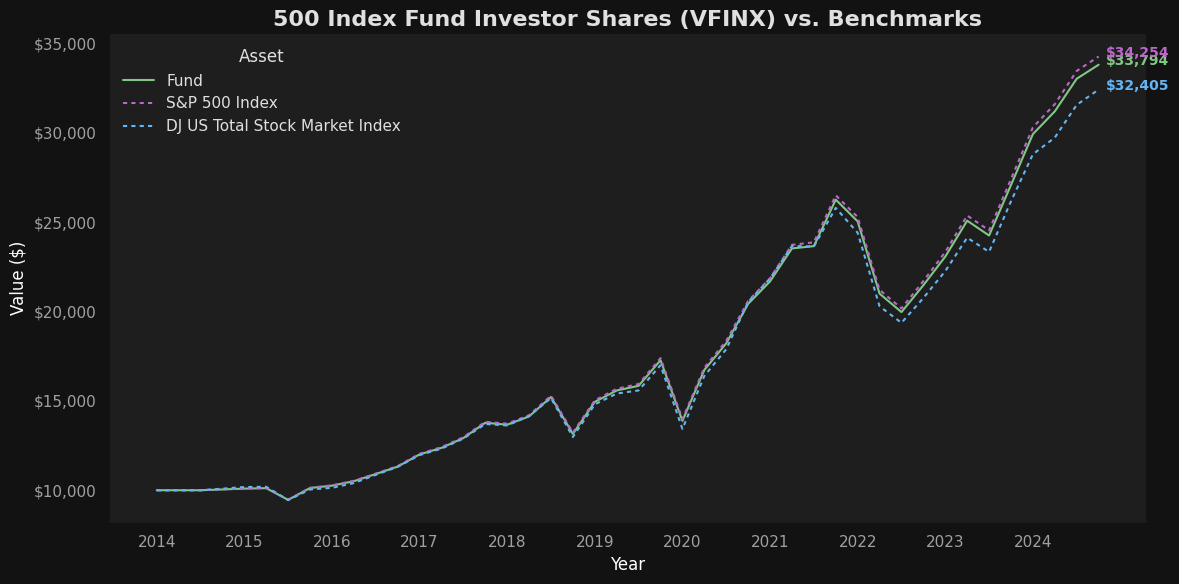

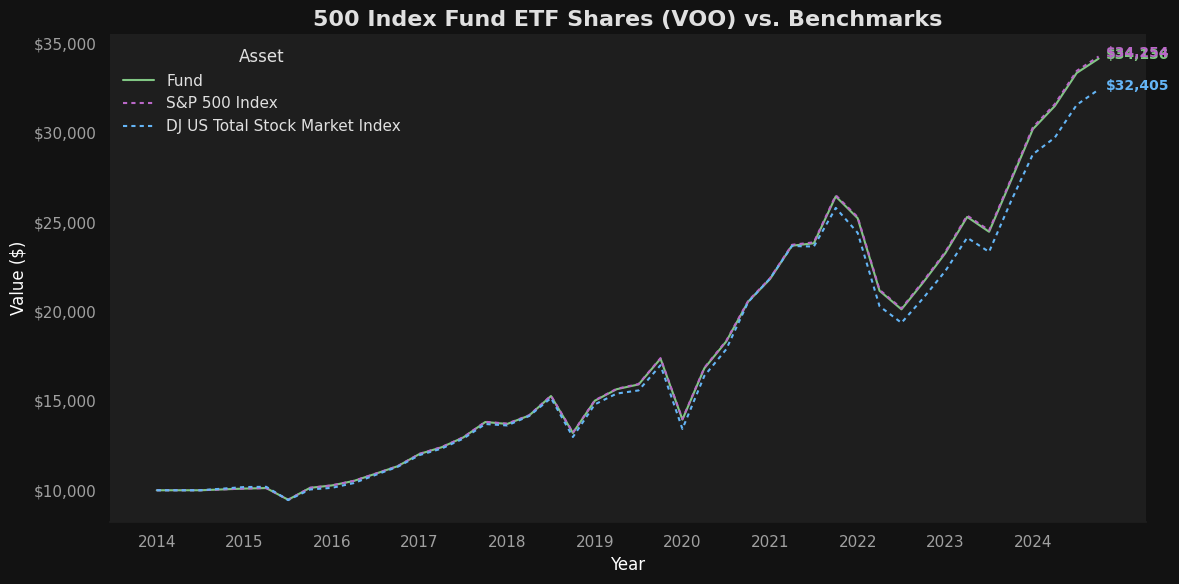

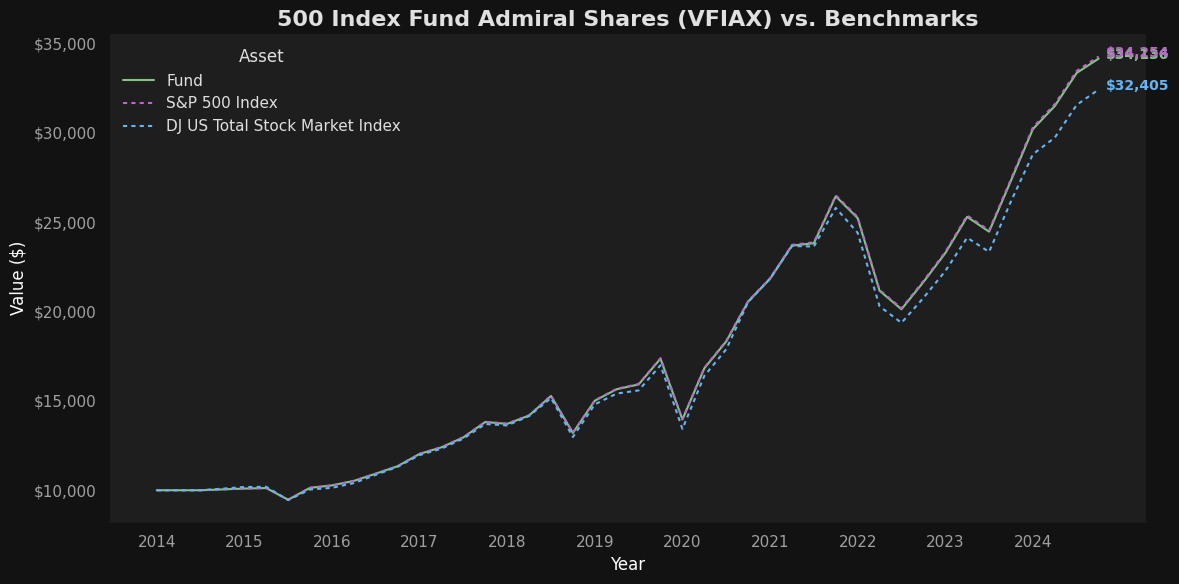

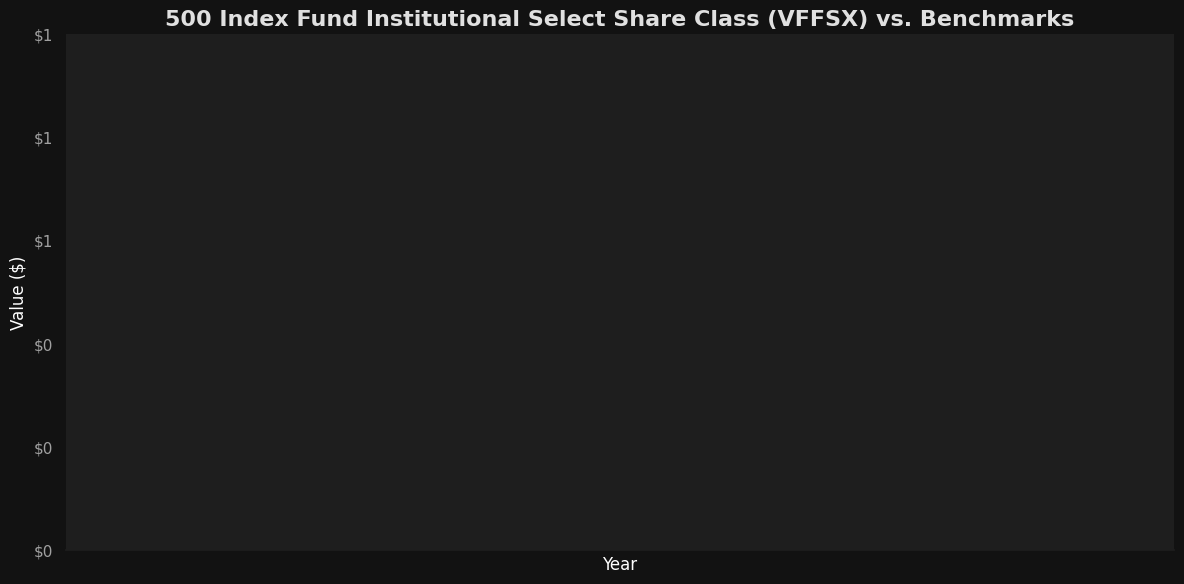

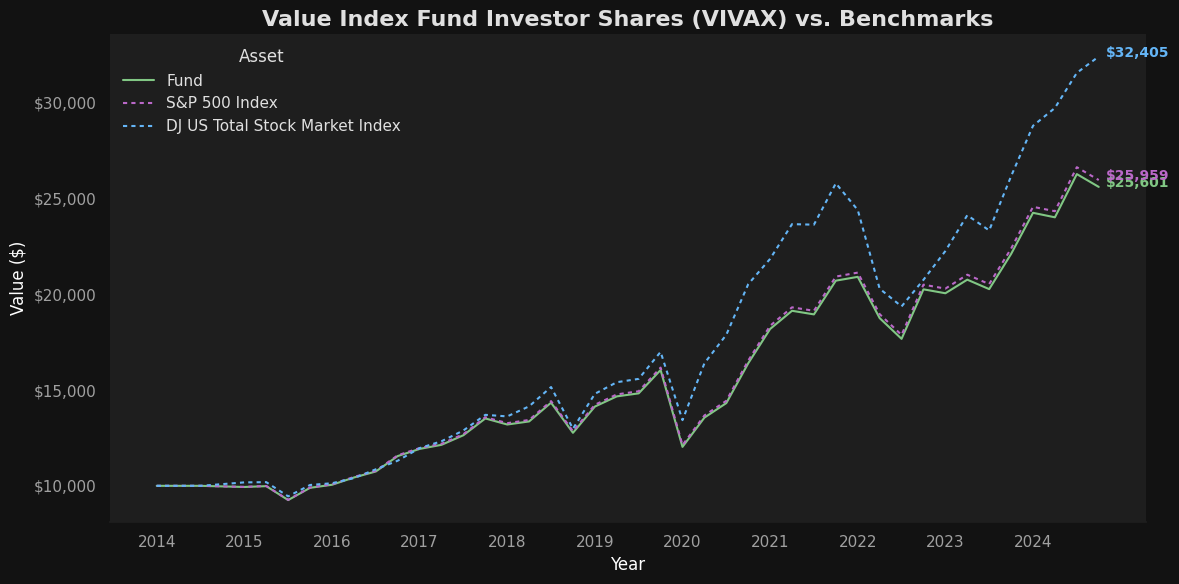

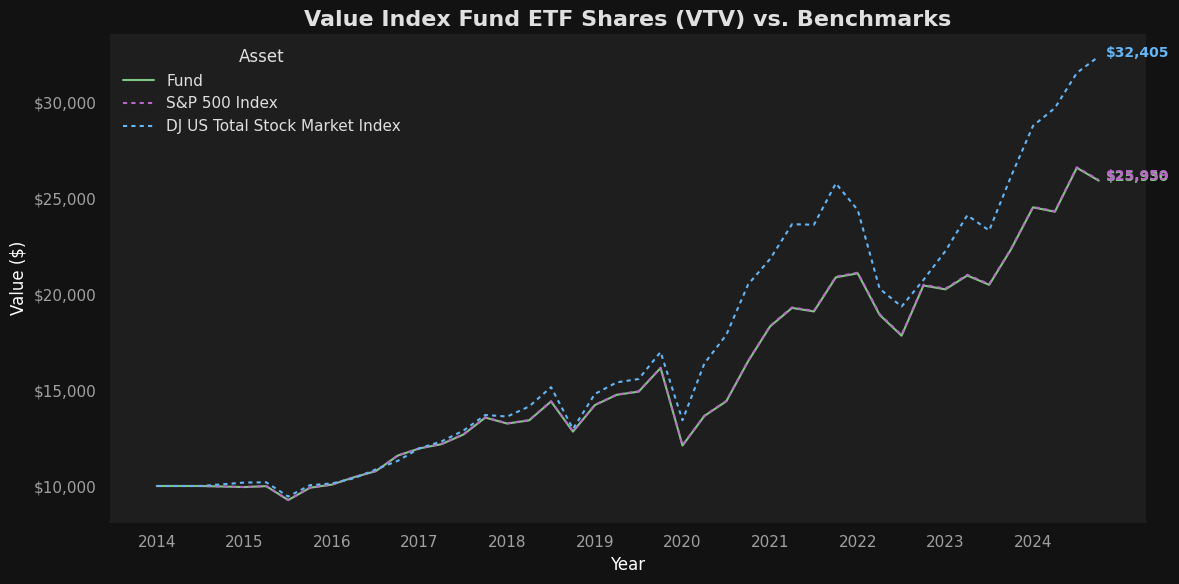

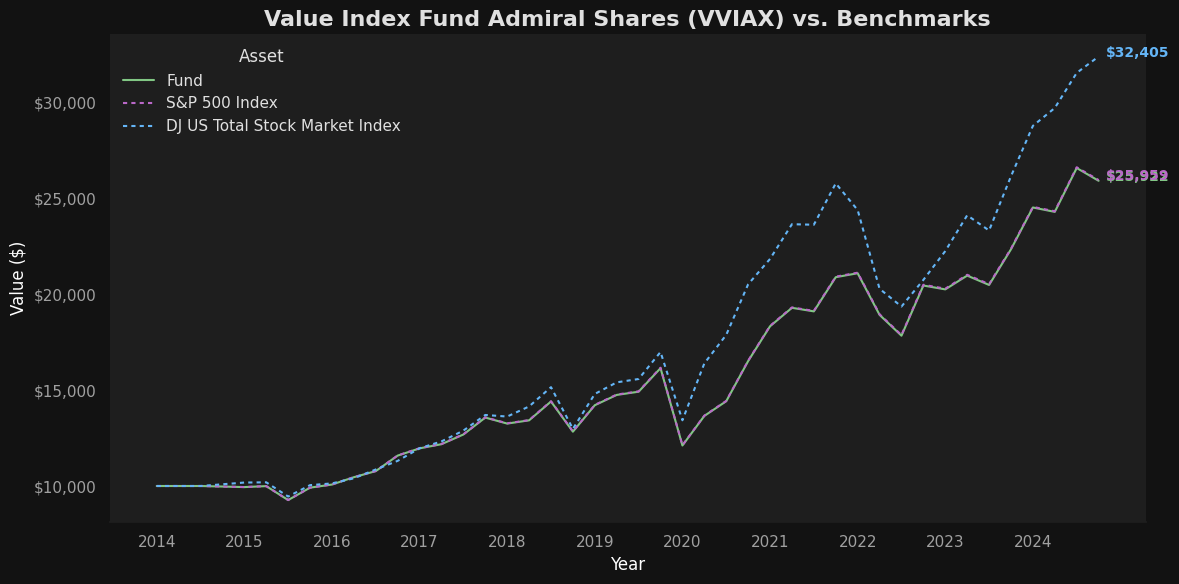

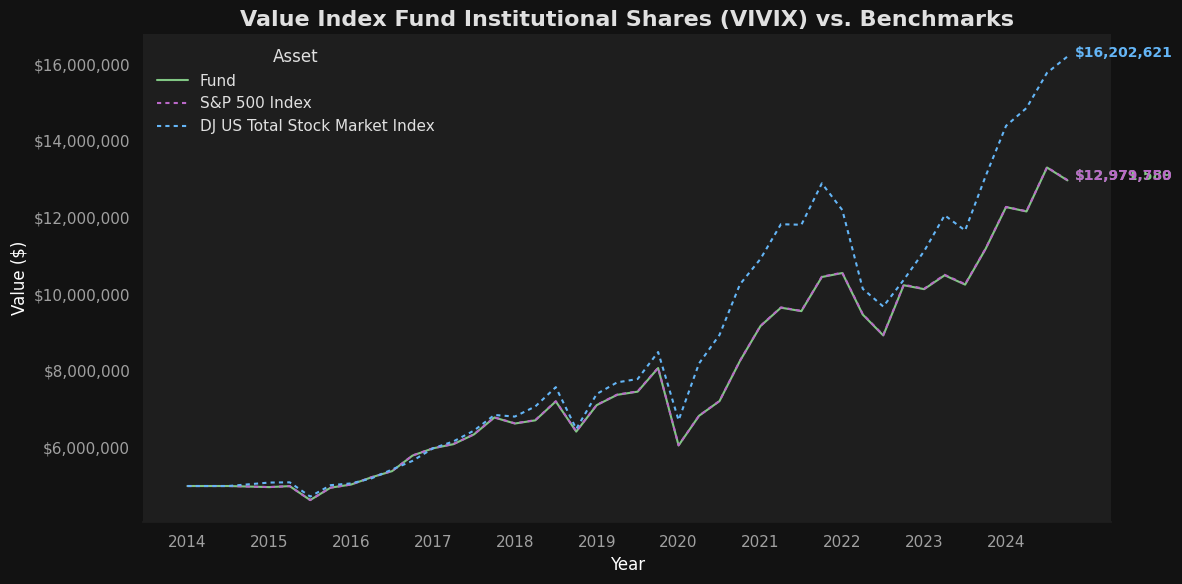

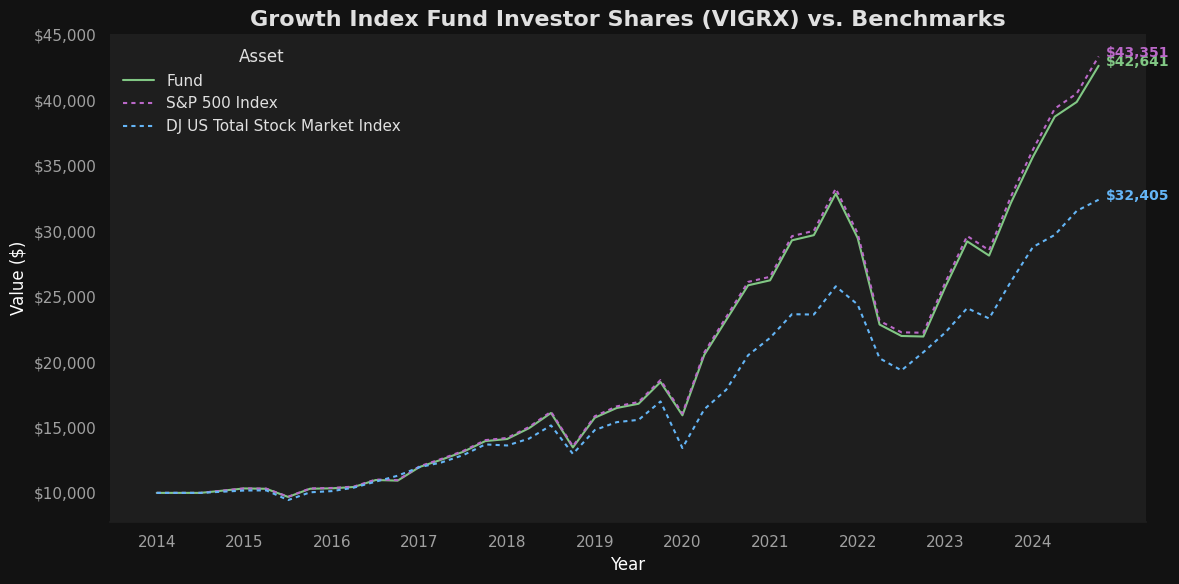

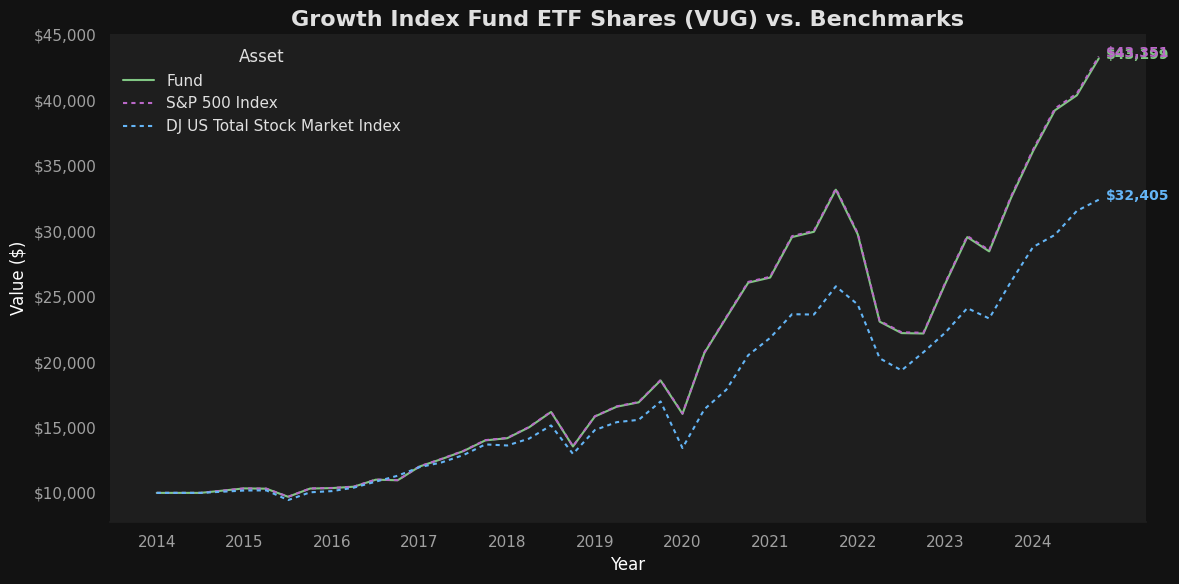

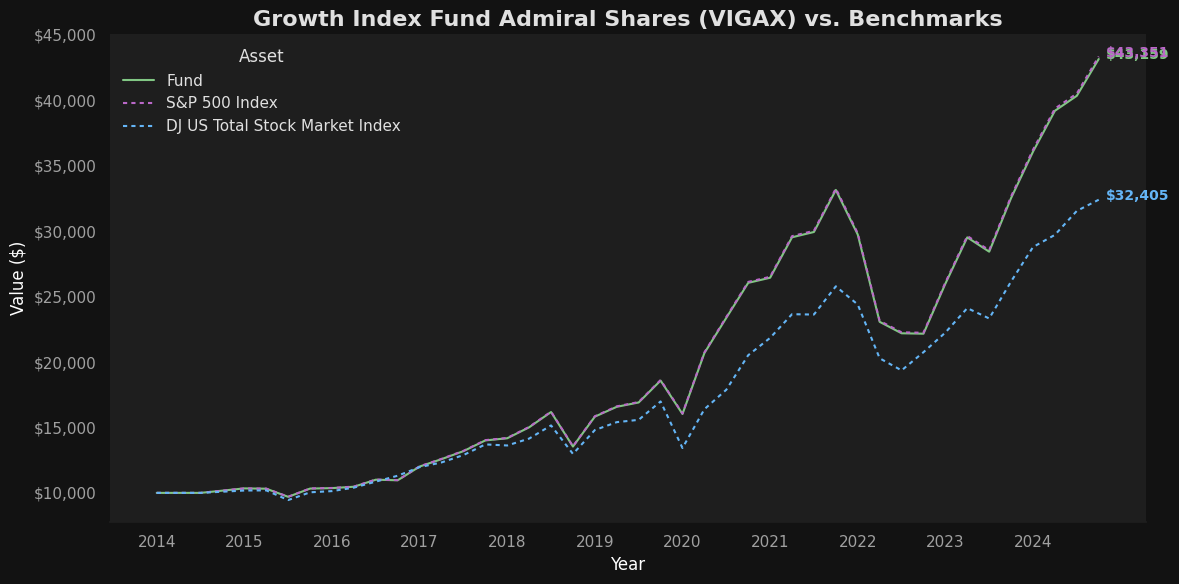

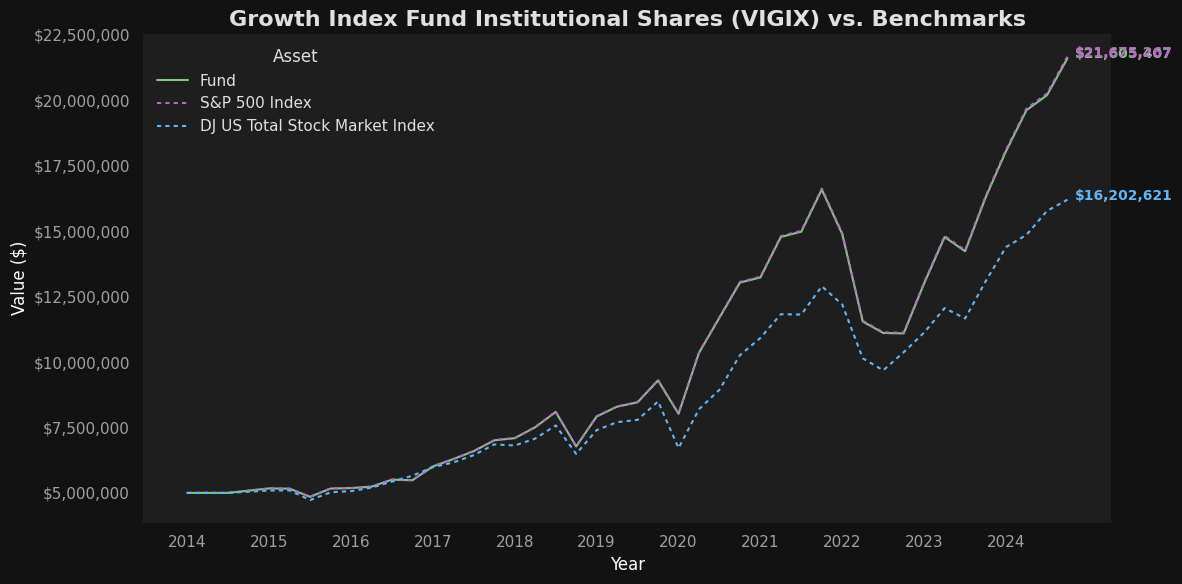

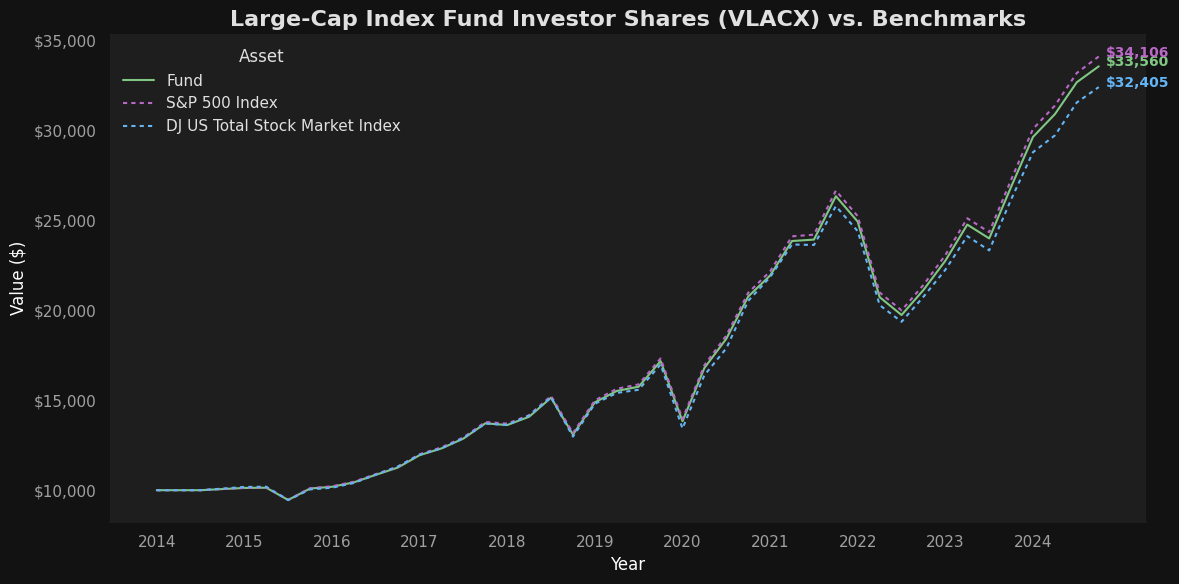

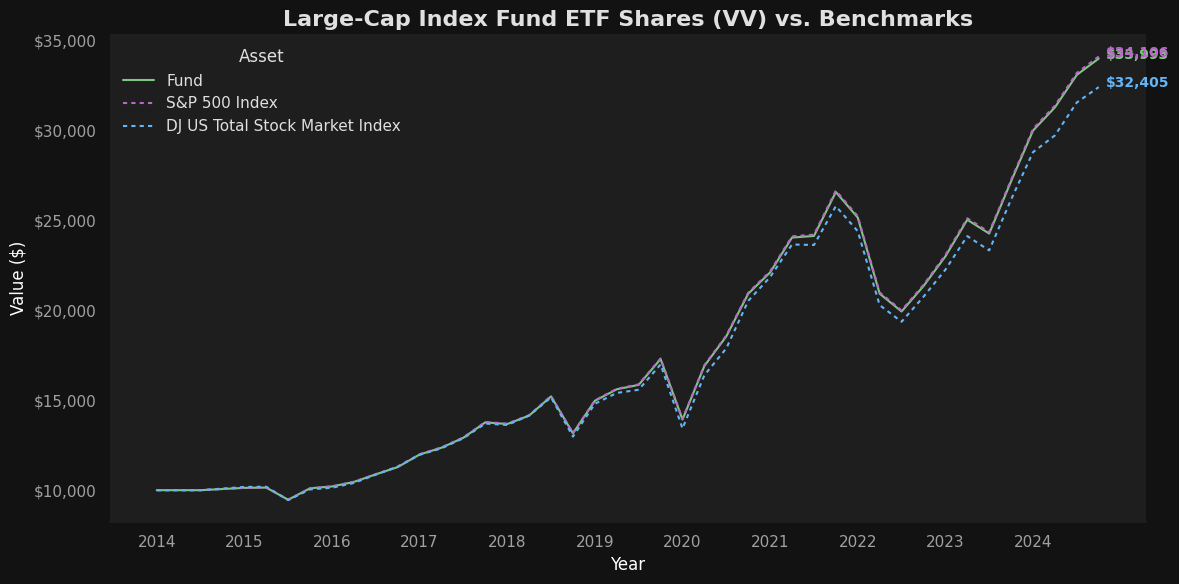

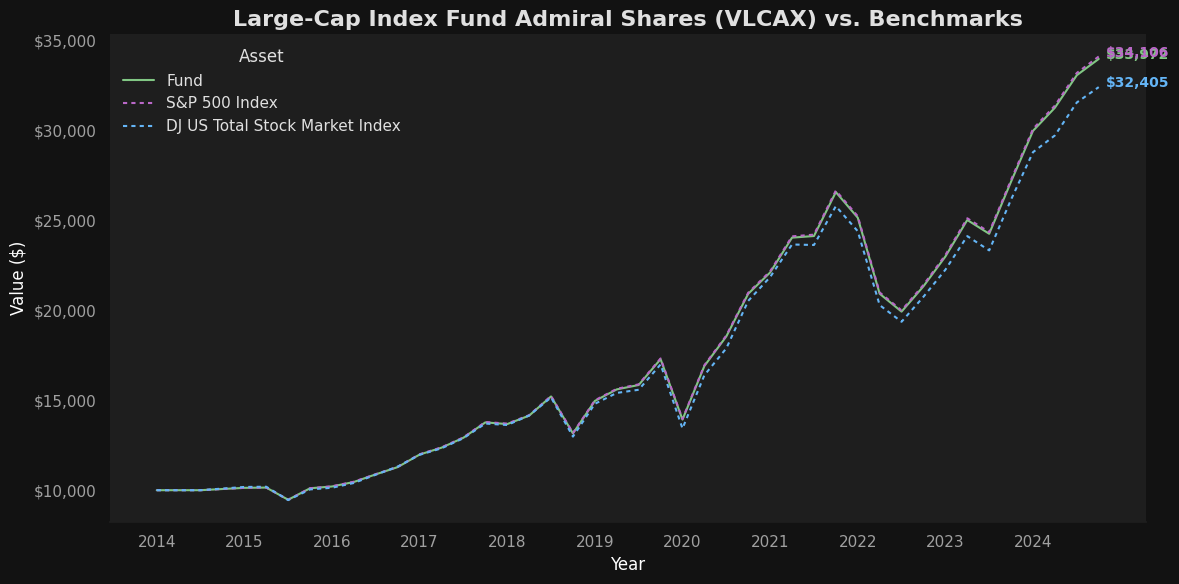

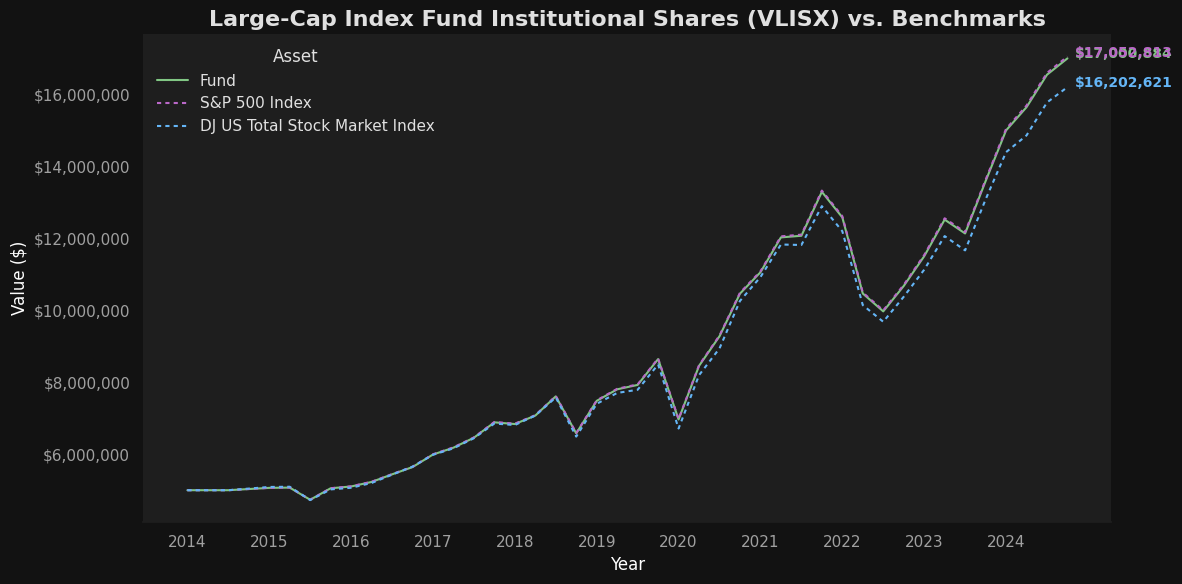

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import os
from io import StringIO


def prepare_chart_data(df_raw):
    df = df_raw.copy()
    df.columns = ['Date', 'Fund', 'S&P 500 Index', 'DJ US Total Stock Market Index']
    
    # 1. FIX: Convert Date to numeric immediately
    df['Date'] = pd.to_numeric(df['Date'], errors='coerce')
    
    # 2. Clean the other columns
    for col in ['Fund', 'S&P 500 Index', 'DJ US Total Stock Market Index']:
        df[col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce') 
        
    # Drop rows with missing data
    df.dropna(subset=['Date', 'Fund', 'S&P 500 Index', 'DJ US Total Stock Market Index'], inplace=True)

    # 3. Calculate Decimal Year
    df['cumcount'] = df.groupby('Date').cumcount()
    df['count'] = df.groupby('Date')['Date'].transform('count')
    
    # Now this works because 'Date' is a number (2014) + float (0.0)
    df['DecimalDate'] = df['Date'] + (df['cumcount'] / df['count'])
        
    df_long = df.melt(id_vars=['Date', 'DecimalDate'], 
                      value_vars=['Fund', 'S&P 500 Index', 'DJ US Total Stock Market Index'],
                      var_name='Asset', 
                      value_name='Value')
    
    return df_long

def generate_seaborn_chart(df_long, ticker="Fund", output_path="./10k_images/"):
    plt.style.use('dark_background')
    
    # Custom rcParams for the "Terminal" look
    plt.rcParams.update({
        "axes.facecolor": "#1e1e1e",
        "figure.facecolor": "#121212",
        "grid.color": "#444444",
        "grid.linestyle": ":",
        "axes.edgecolor": "#1e1e1e", # Hide borders
        "text.color": "#e0e0e0",
        "xtick.color": "#a0a0a0",
        "ytick.color": "#a0a0a0"
    })
    fig, ax = plt.subplots(figsize=(12, 6))
    custom_colors = ["#81c784", "#ba68c8", "#64b5f6", "#ffb74d"]
    sns.set_palette(sns.color_palette(custom_colors))
    assets = df_long['Asset'].unique()
    dash_styles = {}
    for asset in assets:
        
        if "Fund" in asset: # Check if this is the main fund
            dash_styles[asset] = ""      # Solid line
        else:
            dash_styles[asset] = (2, 2)  # Discontinuous line

    # --- 3. PLOT WITH STYLE ---
    sns.lineplot(
        data=df_long, 
        x='DecimalDate', 
        y='Value', 
        hue='Asset', 
        style='Asset',        # Group styles by Asset
        dashes=dash_styles,   # Apply our custom solid/dashed logic
        linewidth=1.5,        # Thin lines
        ax=ax
    )

    ax.set_title(f"{ticker} vs. Benchmarks", fontsize=16, weight='bold')
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Value ($)", fontsize=12)
    ax.ticklabel_format(style='plain', axis='y')
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

    unique_years = df_long['Date'].unique()
    ax.set_xticks(unique_years)
    ax.set_xticklabels(unique_years)

    last_points = df_long.loc[df_long.groupby('Asset')['DecimalDate'].idxmax()]
    asset_order = df_long['Asset'].unique().tolist()
    for i, row in last_points.iterrows():
        line_color = ax.get_lines()[asset_order.index(row['Asset'])].get_color()
        ax.annotate(f"${row['Value']:,.0f}", 
                    xy=(row['DecimalDate'], row['Value']),
                    xytext=(5, 0), textcoords='offset points',
                    fontsize=10, color=line_color, weight='bold')
    
    plt.tight_layout()
    plt.savefig(output_path + ticker + ".png", dpi=300)
    

# --- Generate Chart ---

OUTPUT_PATH = "./10k_images_vs_benchmarks/"
if os.path.exists(OUTPUT_PATH):
    shutil.rmtree(OUTPUT_PATH)
os.makedirs(OUTPUT_PATH, exist_ok=True)

for fund in funds_data:
    try:
        df = pd.DataFrame(fund['table_data'])
        first_column = df.columns[0]
        df.rename(columns={first_column: 'Date'}, inplace=True)
        row_2014 = df[df['Date'] == 2014]
        df_prepared = pd.concat([row_2014, df], ignore_index=True)
        df_ready = prepare_chart_data(df_prepared)
        generate_seaborn_chart(df_ready, ticker=f"{fund['name']} {fund['share_class']} ({fund['ticker']})", output_path=OUTPUT_PATH + fund['name'])
        
    except Exception as e:
        print(f"Error processing {fund['name']}: {str(e)}")

In [ ]:
history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Capital Gains'],
      dtype='object')

In [ ]:


# --- Prepare Data with DecimalDate Logic ---

for fund in funds_data:
    df = pd.DataFrame(funds_data[0]['table_data'])
    first_column = df.columns[0]
    df.rename(columns={first_column: 'Date'}, inplace=True)
    

NameError: name 'funds_data' is not defined

We also would like to obtain the images from the filing.